#Dataset Description

\
# Upload Dataset : https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction/data

## The dataset contains information about Used Cars Price with the following columns:

`index`: Index

`Name`: The brand and model of the car.

`Location`: The location in which the car is being sold or is available for purchase.

`Year`: The year or edition of the model.

`Kilometers_Driven`: The total kilometres driven in the car by the previous owner(s) in KM.

`Fuel_Type`: The type of fuel used by the car. (Petrol / Diesel / Electric / CNG / LPG)

`Transmission`: The type of transmission used by the car. (Automatic / Manual)

`Owner_Type`: Whether the ownership is Firsthand, Second hand or other.

`Mileage`: The standard mileage offered by the car company in kmpl or km/kg

`Engine`: The displacement volume of the engine in cc.


#Tasks

## 1 . Data Cleaning

### Read the dataset

In [1]:
import pandas as pd

df = pd.read_csv('train-data.csv',index_col=0)

### Handling Missing Values

In [2]:
import numpy as np

def filling_new_price(value):
    if not(pd.isna(value)):
        value = float((value.split(" "))[0])
    return value

df.isna().sum()

df['New_Price'] = df['New_Price'].apply(filling_new_price)
df['Mileage'].fillna(df['Mileage'].mode()[0],inplace=True)
df['Engine'].fillna(df['Engine'].mode()[0],inplace=True)
df['Power'].fillna(df['Power'].mode()[0],inplace=True)
df['Seats'].fillna(df['Seats'].mode()[0],inplace=True)
df['New_Price'].fillna(df['New_Price'].mean(),inplace=True)

### Correct any inconsistent data entries.

In [3]:
df['Mileage'] = df['Mileage'].str.replace(' km/kg', '')
df['Mileage'] = df['Mileage'].str.replace(' kmpl', '')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

df['Engine'] = df['Engine'].str.replace(' CC', '')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

df['Power'] = df['Power'].str.replace(' bhp', '')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

### Ensure data types are appropriate for each column.

---

In [4]:
df.info()

# After solving the inconsistencies in all columns we make sure each column in the right data type

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   int64  
 9   Power              5912 non-null   float64
 10  Seats              6019 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 658.3+ KB


## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [ ]:
df.describe()

### Identify and analyze patterns in the data.

In [5]:
df['Power'].mean()

113.01402571041947

In [6]:
df['Mileage'].mean()

18.134583817909952

In [8]:
df.groupby('Owner_Type').agg(
    Average_Mileage = ('Mileage','mean'),
    Average_Power = ('Power','mean'),
    Average_Price = ('Price','mean'),
)

,Average_Mileage,Average_Power,Average_Price
Owner_Type,,,
First,18.460814,112.325798,9.962445
Fourth & Above,12.322222,101.187500,3.280000
Second,16.852810,116.584771,7.599886
Third,15.347699,113.949612,5.007257


### Visualize the distribution of key variables.

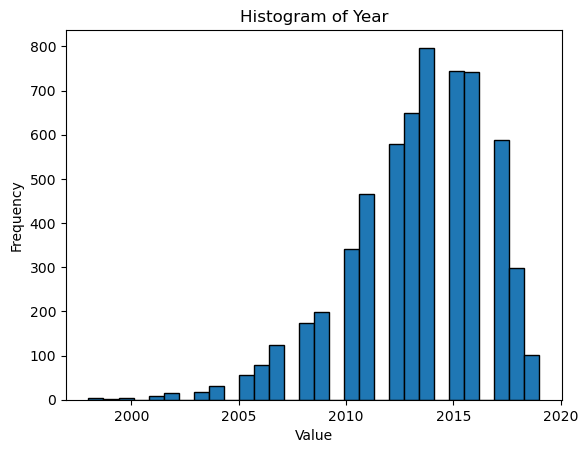

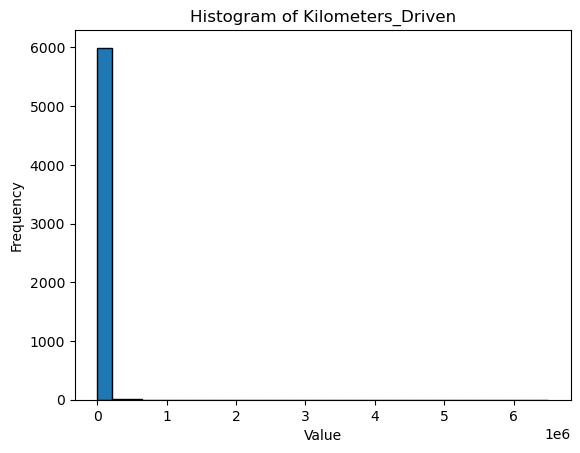

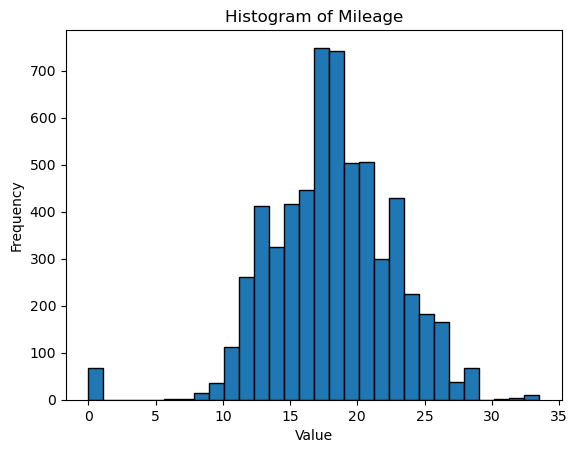

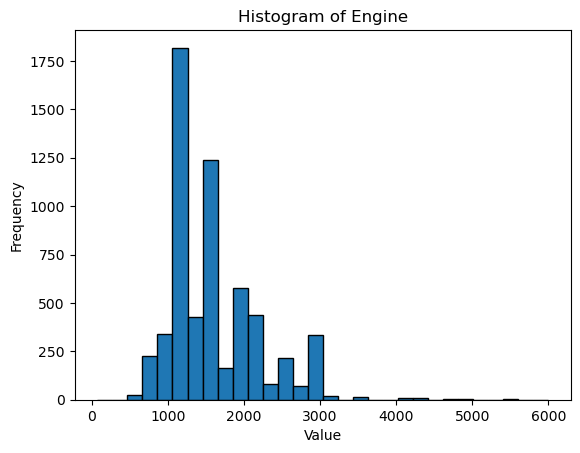

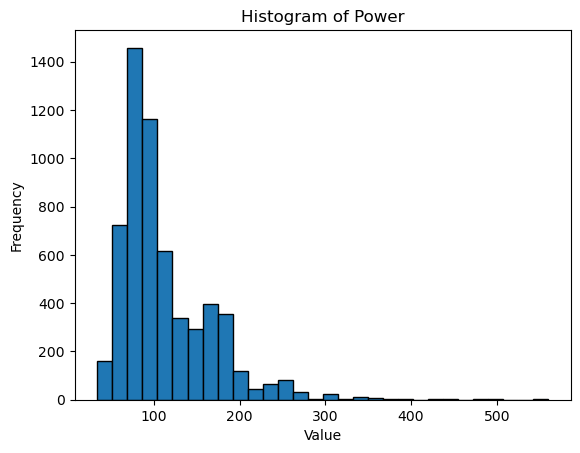

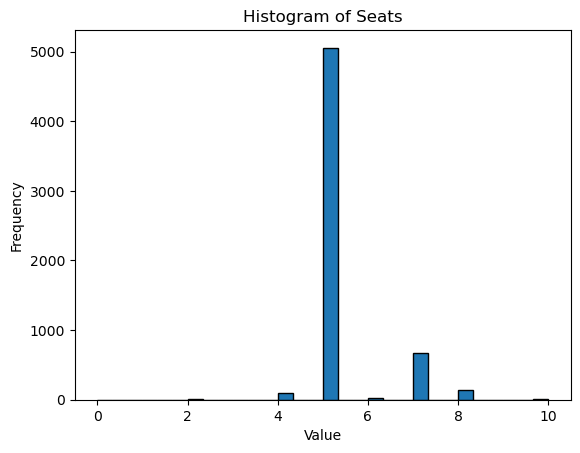

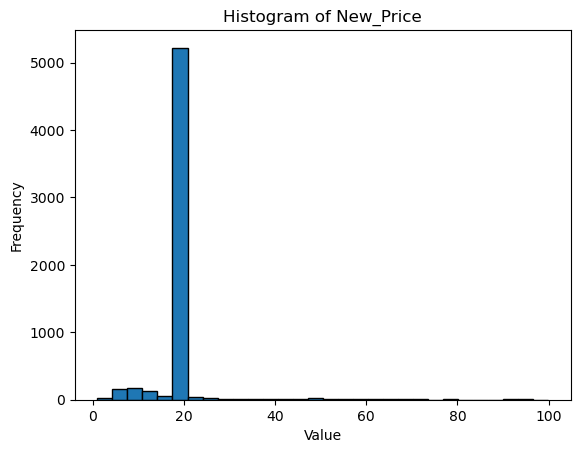

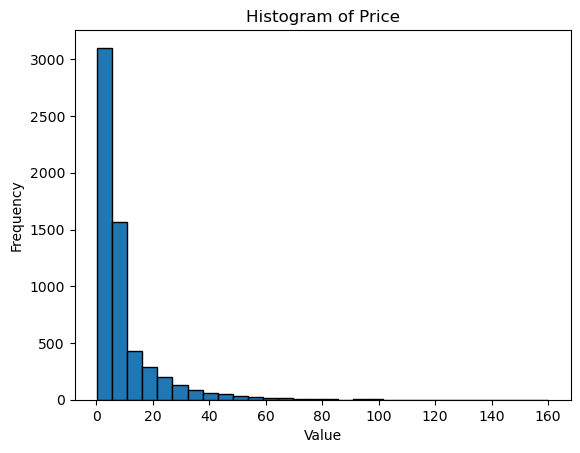

In [9]:
import matplotlib.pyplot as plt

for column in df.select_dtypes(exclude=['object']).columns:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

### Explore relationships between variables.


In [12]:
corr_matrix = df.select_dtypes(exclude=['object']).corr()
corr_matrix

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Year,1.000000,-0.173048,0.321527,-0.046288,0.020247,0.015204,-0.003023,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.065242,0.090476,0.032982,0.082782,0.000465,-0.011493
Mileage,0.321527,-0.065242,1.000000,-0.581202,-0.520910,-0.299600,-0.122216,-0.306610
Engine,-0.046288,0.090476,-0.581202,1.000000,0.866605,0.393849,0.211727,0.657196
Power,0.020247,0.032982,-0.520910,0.866605,1.000000,0.102948,0.276555,0.770992
Seats,0.015204,0.082782,-0.299600,0.393849,0.102948,1.000000,-0.005317,0.052811
New_Price,-0.003023,0.000465,-0.122216,0.211727,0.276555,-0.005317,1.000000,0.337048
Price,0.305327,-0.011493,-0.306610,0.657196,0.770992,0.052811,0.337048,1.000000


## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

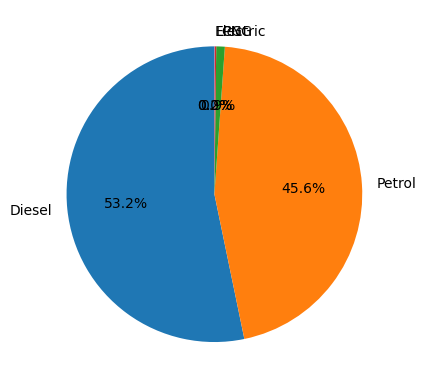

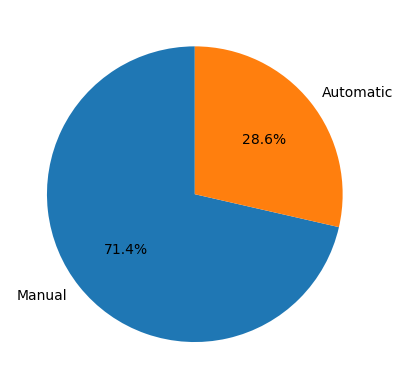

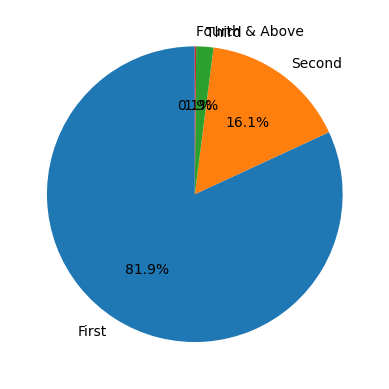

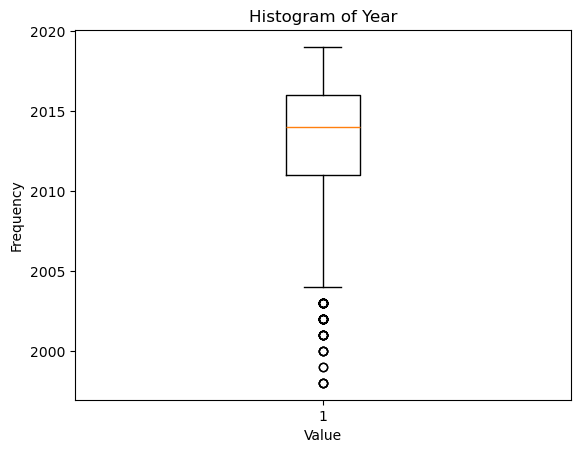

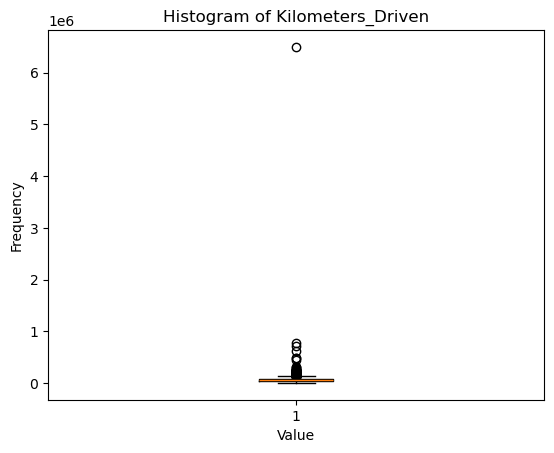

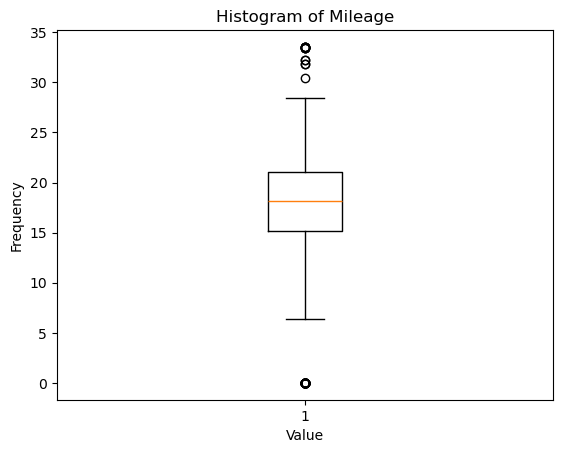

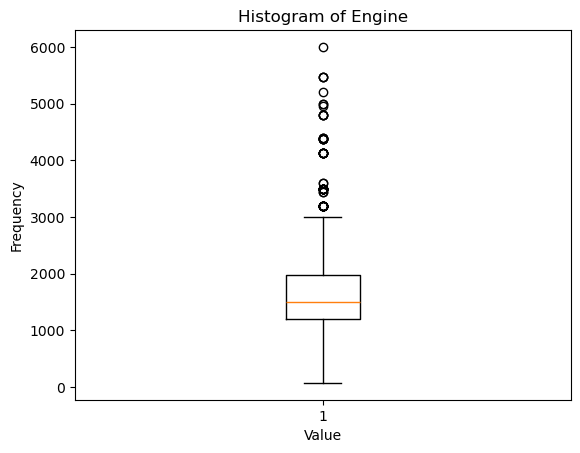

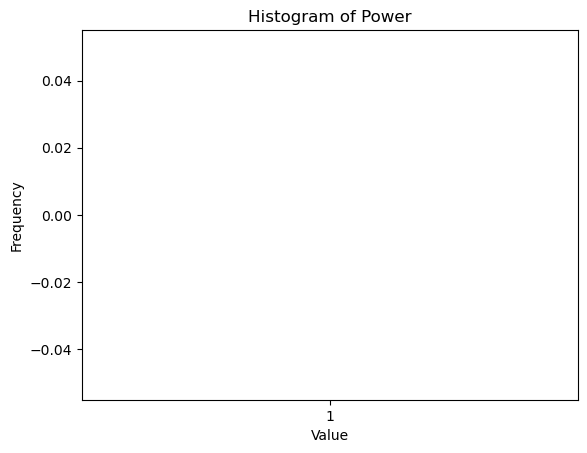

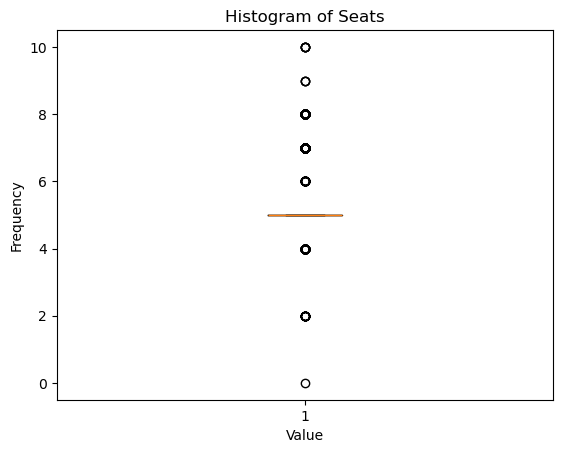

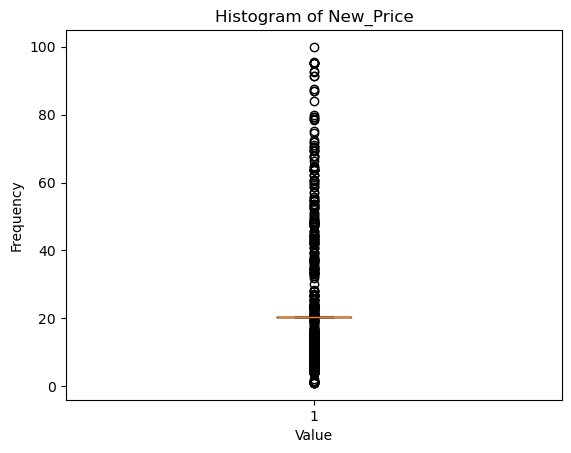

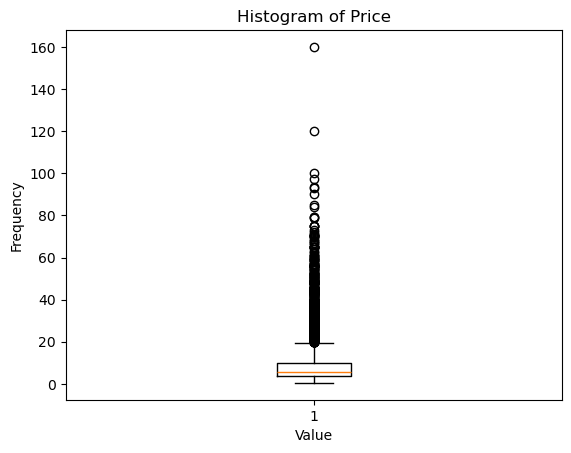

<Axes: >

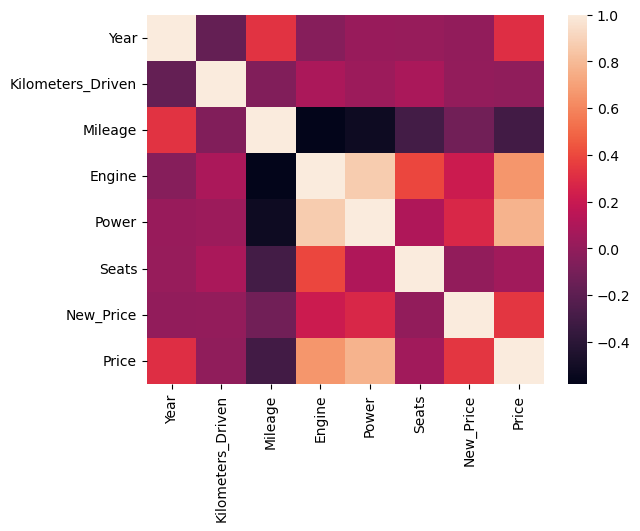

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
plt.pie(df['Fuel_Type'].value_counts(), labels=df['Fuel_Type'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.show()

plt.figure()
plt.pie(df['Transmission'].value_counts(), labels=df['Transmission'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.show()

plt.figure()
plt.pie(df['Owner_Type'].value_counts(), labels=df['Owner_Type'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.show()


for column in df.select_dtypes(exclude=['object']).columns:
    plt.figure()  # Create a new figure for each histogram
    plt.boxplot(df[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


sns.heatmap(corr_matrix)

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [ ]:
# From the values we got the pattern of the numerical graph
# The Year & Price graph is skewed to the right
# The Milage graph is normal distribution
# The engine & Power graphs is skewed to the left

# From from the other categorical data we can see that
# The most type of owner is usually the first ownership
# and 3 quarters of cars are manual cars on transmission
# Half of cars' engines are diseal and almost half is patrol the others is less than 1% combines

# Because of the skewedness of the graphs we can predict that there are some outliers in that graph and we can see 
# it in the box plots of each numerical columns

# In the heatmap we can see there is no relationships near negative correlation and most of them are around no correlation to 
# postive correlation. Like, Power & Price columns
# We didn't encode the categorical data and just analyses the numerical data for the correlation